In [54]:
import os
import sys
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import scipy
from skimage.filters import threshold_otsu
from scipy.ndimage.morphology import distance_transform_edt

import tcripser
import gudhi,gudhi.hera,gudhi.wasserstein,persim
import pickle

import imageio
from imageio.v3 import imread

In [4]:
f=pickle.load(open("Z:/data/polyDefect/trainPickles/dataUnpacked0.p","rb"))

In [6]:
f.shape

(100, 10, 64, 64, 64)

In [30]:
t0cubes=f[:,0,:,:,:]
t1cubes=f[:,1,:,:,:]
t4cubes=f[:,4,:,:,:]
t8cubes=f[:,8,:,:,:]

(array([2.3175e+04, 7.7069e+04, 8.6885e+04, 5.0076e+04, 1.8730e+04,
        5.0100e+03, 1.0240e+03, 1.5800e+02, 1.4000e+01, 3.0000e+00]),
 array([0.        , 0.19839999, 0.39679998, 0.5952    , 0.79359996,
        0.992     , 1.1904    , 1.3888    , 1.5871999 , 1.7856    ,
        1.984     ], dtype=float32),
 <BarContainer object of 10 artists>)

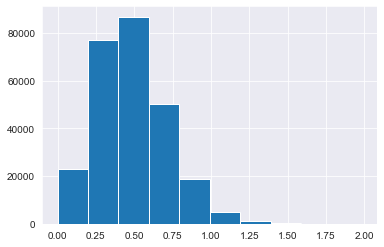

In [11]:
plt.hist(t0cubes[0].flatten())

(array([9.8909e+04, 3.0793e+04, 3.6681e+04, 3.2426e+04, 3.9578e+04,
        1.6119e+04, 6.6460e+03, 8.6300e+02, 1.1800e+02, 1.1000e+01]),
 array([0.   , 0.224, 0.448, 0.672, 0.896, 1.12 , 1.344, 1.568, 1.792,
        2.016, 2.24 ], dtype=float32),
 <BarContainer object of 10 artists>)

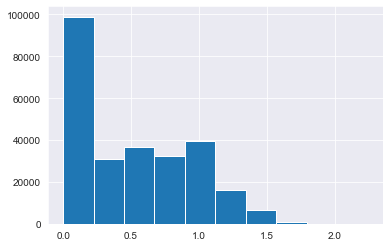

In [12]:
plt.hist(t8cubes[0].flatten())

In [37]:
np.median(t4cubes[0].flatten())

0.448

In [14]:
np.mean(t8cubes[0].flatten())

0.5

In [15]:
from topDFT import *

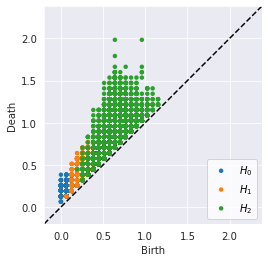

In [16]:
diags,maxD=persistCube(t0cubes[0])
plot_diagrams(diags)

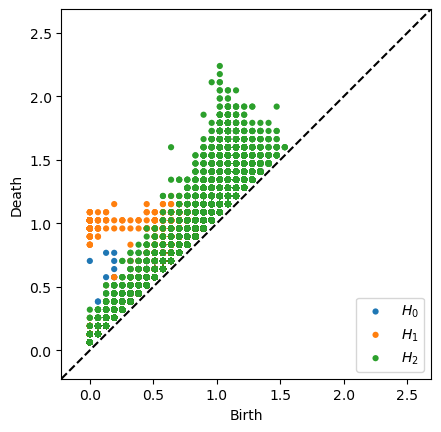

In [17]:
diags,maxD=persistCube(t8cubes[0])
plot_diagrams(diags)

## dp 43

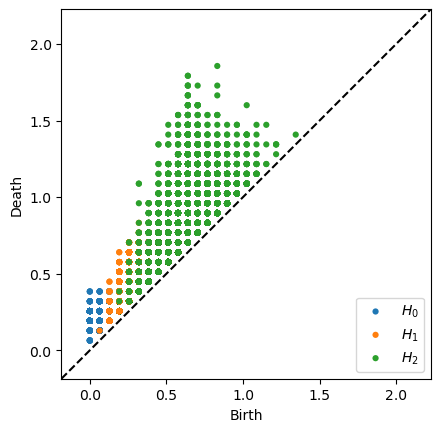

In [18]:
diags,maxD=persistCube(t0cubes[42])
plot_diagrams(diags)

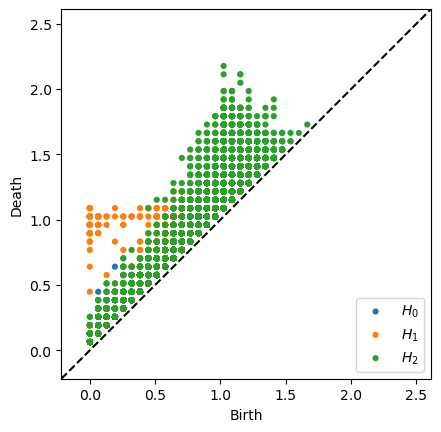

In [19]:
diags,maxD=persistCube(t8cubes[42])
plot_diagrams(diags)

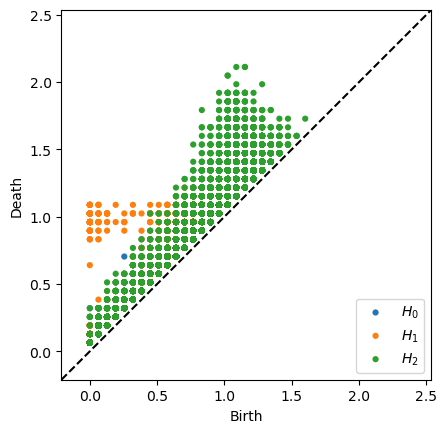

In [24]:
diags,maxD=persistCube(t4cubes[42])
plot_diagrams(diags)

# geo check

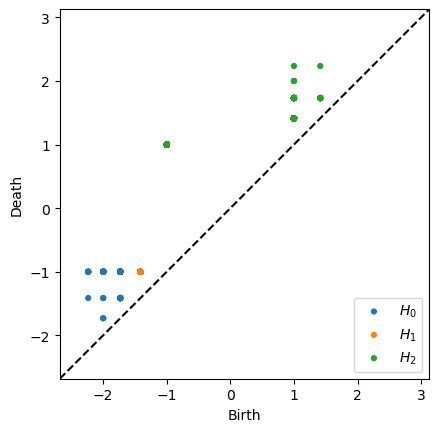

In [21]:
diags,maxD=persistGeoVoxel(t0cubes[42],eps=.5)
plot_diagrams(diags)

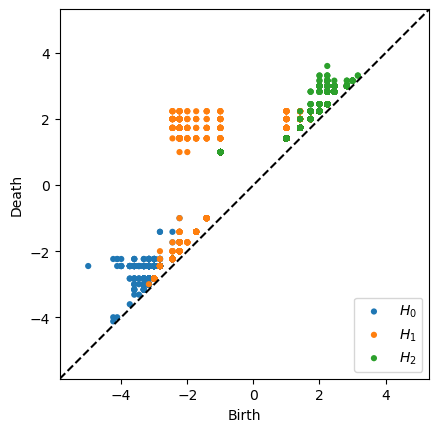

In [32]:
diags, maxD = persistGeoVoxel(t1cubes[42], eps=.5)
plot_diagrams(diags)


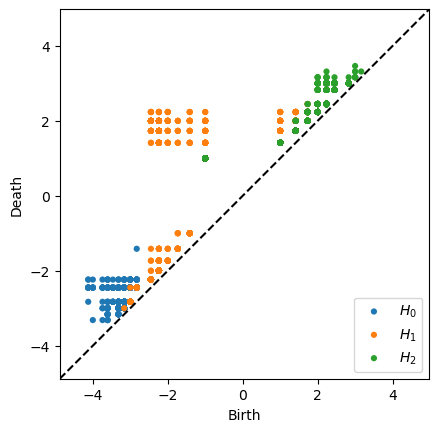

In [31]:
diags, maxD = persistGeoVoxel(t1cubes[0], eps=.5)
plot_diagrams(diags)


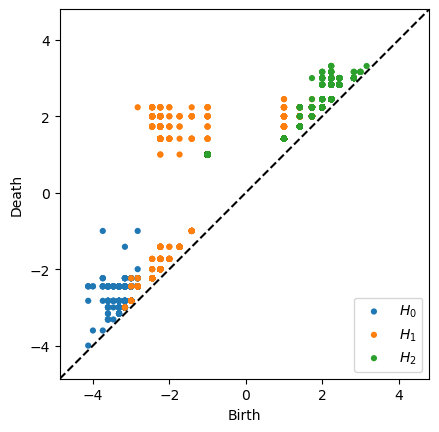

In [26]:
diags,maxD=persistGeoVoxel(t4cubes[42],eps=.5)
plot_diagrams(diags)

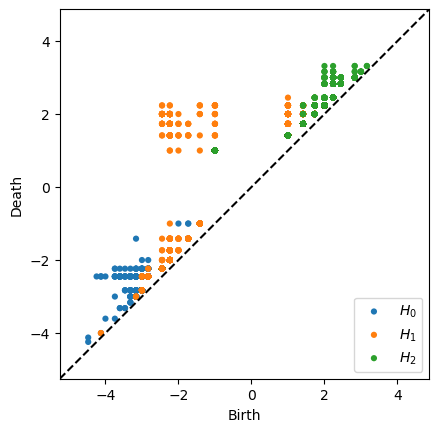

In [22]:
diags,maxD=persistGeoVoxel(t8cubes[42],eps=.5)
plot_diagrams(diags)

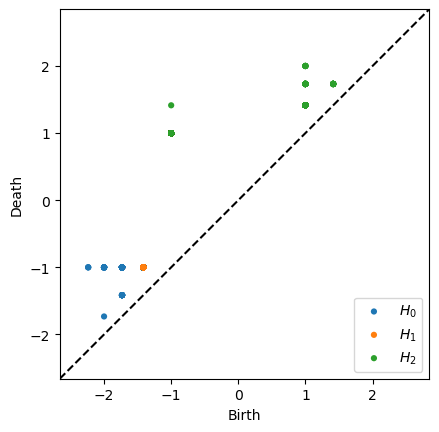

In [27]:
diags, maxD = persistGeoVoxel(t0cubes[0], eps=.5)
plot_diagrams(diags)



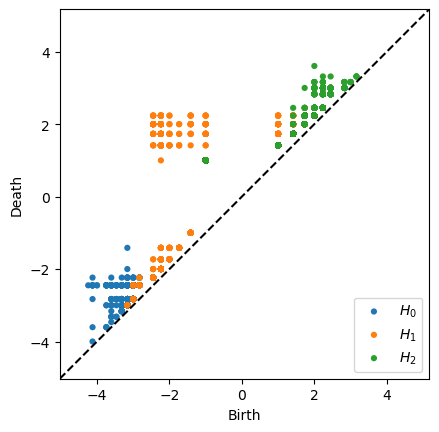

In [28]:
diags, maxD = persistGeoVoxel(t4cubes[0], eps=.5)
plot_diagrams(diags)


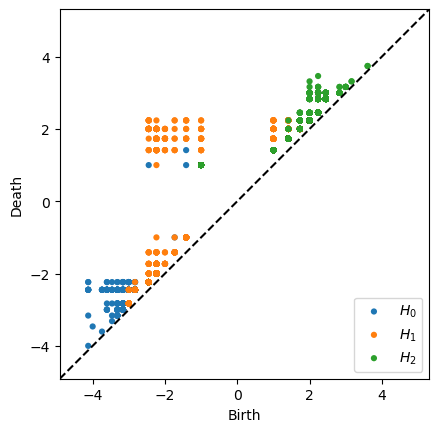

In [29]:
diags, maxD = persistGeoVoxel(t8cubes[0], eps=.5)
plot_diagrams(diags)


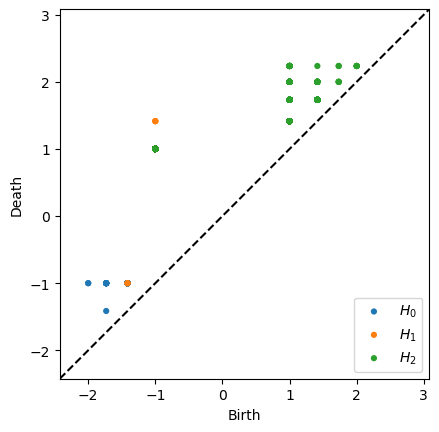

In [41]:
diags, maxD = persistGeoVoxel(t0cubes[0], eps=.42)
plot_diagrams(diags)


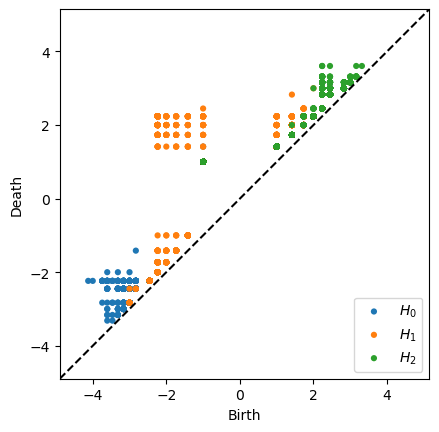

In [39]:
diags, maxD = persistGeoVoxel(t1cubes[0], eps=.448)
plot_diagrams(diags)


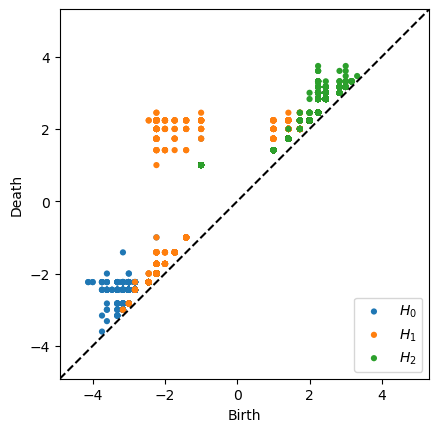

In [40]:
diags, maxD = persistGeoVoxel(t4cubes[0], eps=.448)
plot_diagrams(diags)


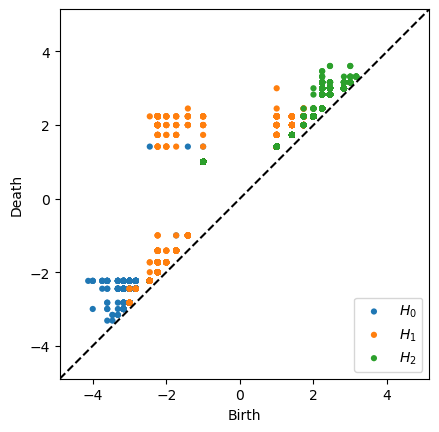

In [38]:
diags, maxD = persistGeoVoxel(t8cubes[0], eps=.448)
plot_diagrams(diags)


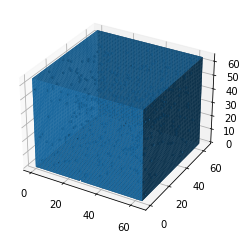

In [49]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(f[0][0])
plt.show()

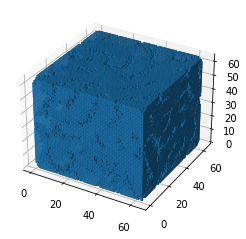

In [50]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(f[0][8])
plt.show()

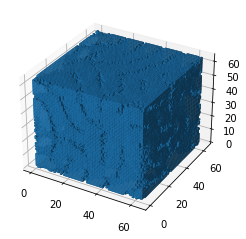

In [51]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(f[42][8])
plt.show()

C:\Users\moore\anaconda3\lib\site-packages\PIL\Image.py:3035: DecompressionBombWarning: Image size (116857182 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


KeyboardInterrupt: 

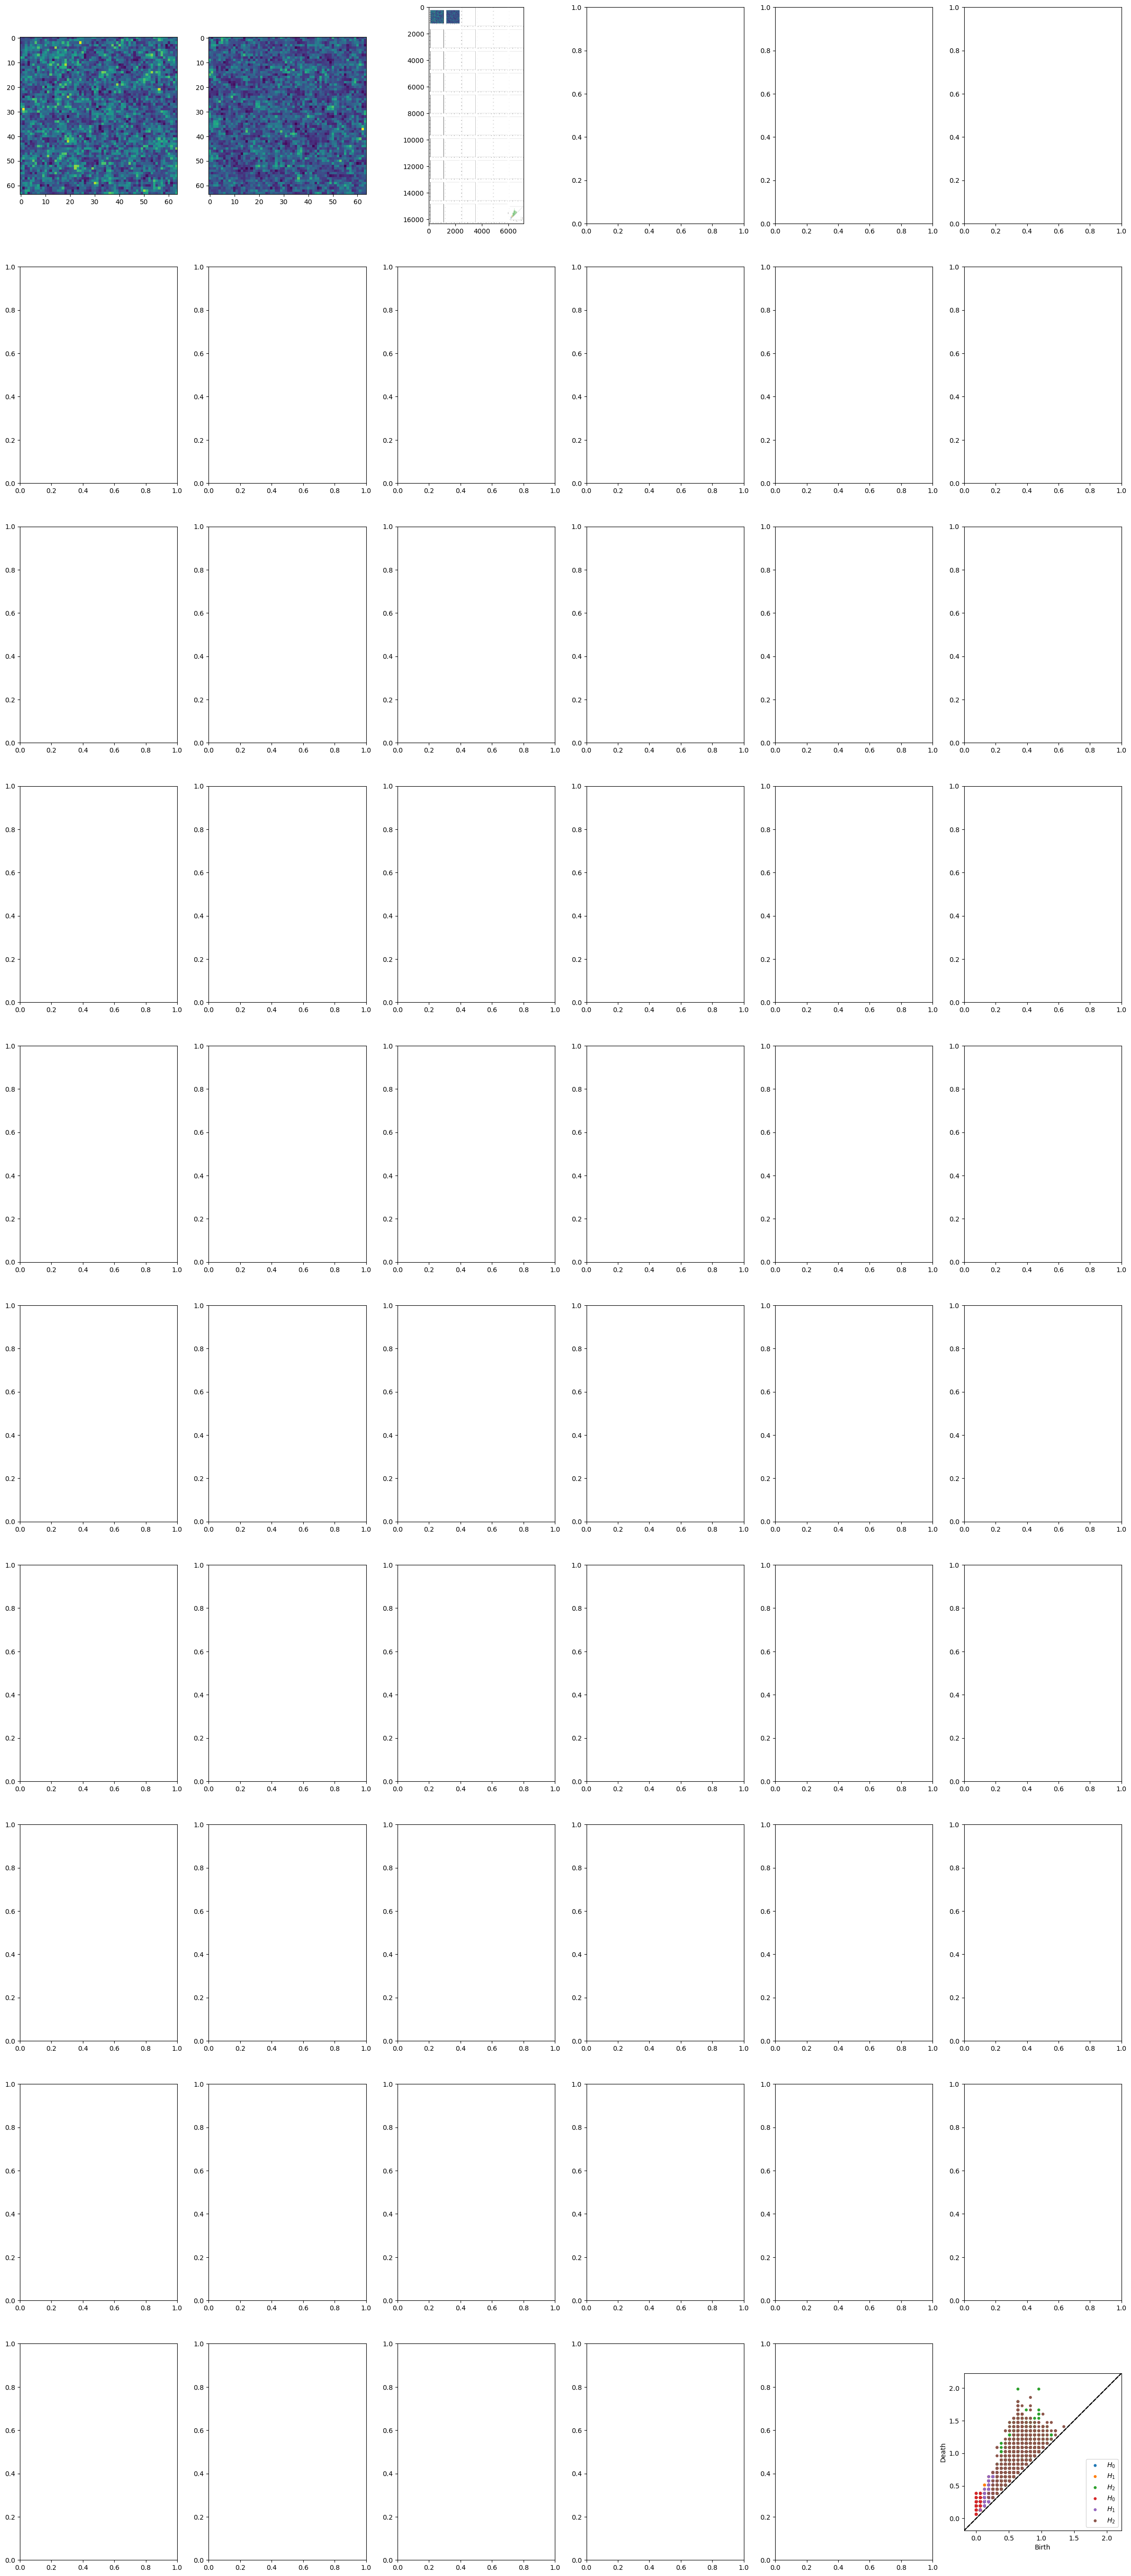

In [59]:
fig, ax = plt.subplots(10,6,figsize=(15,40))
cubA=f[0]
cubB=f[42]
tDiagsA={}
tDiagsAGeo={}

tDiagsB={}
tDiagsBGeo={}
loc="Z:/data/polyDefect/topology/plots"
for t in range(10):
    ax[t,0].imshow(cubA[t][:,31,:])
    ax[t,1].imshow(cubB[t][:,31,:])


    diags,maxD=persistCube(cubA[t])
    plot_diagrams(diags.copy(),show=False,saveLoc=f"{loc}/block0train/topFilt{t}.png")
    ##savePic then imshow
    ax[t,2].imshow(imread(f"{loc}/block0train/topFilt{t}.png"))

    tDiagsA[t]=diags.copy()
    diags,maxD=persistCube(cubB[t])
    tDiagsB[t]=diags.copy()
    plot_diagrams(diags.copy(),show=False,saveLoc=f"{loc}/block42train/topFilt{t}.png")
    ax[t,3].imshow(imread(f"{loc}/block42train/topFilt{t}.png"))


    ##geos
    diags,maxD=persistGeoVoxel(cubA[t],eps=.448)
    plot_diagrams(diags.copy(),show=False,saveLoc=f"{loc}/block0train/topGeoMed{t}.png")
    ##savePic then imshow
    ax[t,4].imshow(imread(f"{loc}/block0train/topGeo{t}.png"))

    tDiagsAGeo[t]=diags.copy()
    diags,maxD=persistGeoVoxel(cubB[t],eps=.448)
    tDiagsBGeo[t]=diags.copy()
    plot_diagrams(diags.copy(),show=False,saveLoc=f"{loc}/block42train/topGeoMed{t}.png")
    ax[t,5].imshow(imread(f"{loc}/block42train/topGeo{t}.png"))

fig.show()



In [62]:
fig.clear()
plt.close()
loc="Z:/data/polyDefect/topology/plots"
for t in range(10):
    diags,maxD=persistCube(cubA[t])
    plot_diagrams(diags.copy(),show=False,saveLoc=f"{loc}/block0train/topFilt{t}.png")
    fig.clear()
    plt.close()



    tDiagsA[t]=diags.copy()
    diags,maxD=persistCube(cubB[t])
    tDiagsB[t]=diags.copy()
    plot_diagrams(diags.copy(),show=False,saveLoc=f"{loc}/block42train/topFilt{t}.png")
    fig.clear()
    plt.close()

    diags,maxD=persistGeoVoxel(cubA[t],eps=.448)
    plot_diagrams(diags.copy(),show=False,saveLoc=f"{loc}/block0train/topGeoMed{t}.png")
    fig.clear()
    plt.close()
    tDiagsAGeo[t]=diags.copy()
    diags,maxD=persistGeoVoxel(cubB[t],eps=.448)
    tDiagsBGeo[t]=diags.copy()
    plot_diagrams(diags.copy(),show=False,saveLoc=f"{loc}/block42train/topGeoMed{t}.png")
    fig.clear()
    plt.close()

## for just 2d slice below

In [71]:
fig.clear()
plt.close()
loc="Z:/data/polyDefect/topology/plots/2dSlice"
for t in range(10):
    diags,maxD=persistCube(cubA[t])
    plot_diagrams(diags[:-1].copy(),show=False,saveLoc=f"{loc}/block0train/topFilt{t}.png")
    fig.clear()
    plt.close()



    tDiagsA[t]=diags.copy()
    diags,maxD=persistCube(cubB[t])
    tDiagsB[t]=diags.copy()
    plot_diagrams(diags[:-1].copy(),show=False,saveLoc=f"{loc}/block42train/topFilt{t}.png")
    fig.clear()
    plt.close()

    diags,maxD=persistGeoVoxel(cubA[t],eps=.448)
    plot_diagrams(diags[:-1].copy(),show=False,saveLoc=f"{loc}/block0train/topGeoMed{t}.png")
    fig.clear()
    plt.close()
    tDiagsAGeo[t]=diags.copy()
    diags,maxD=persistGeoVoxel(cubB[t],eps=.448)
    tDiagsBGeo[t]=diags.copy()
    plot_diagrams(diags[:-1].copy(),show=False,saveLoc=f"{loc}/block42train/topGeoMed{t}.png")
    fig.clear()
    plt.close()

In [ ]:
fig.clear()
plt.close()
loc="Z:/data/polyDefect/topology/plots"
for t in range(10):
    diags,maxD=persistCube(cubA[t])
    plot_diagrams(diags.copy(),show=False,saveLoc=f"{loc}/block0train/topFilt{t}.png")
    fig.clear()
    plt.close()



    tDiagsA[t]=diags.copy()
    diags,maxD=persistCube(cubB[t])
    tDiagsB[t]=diags.copy()
    plot_diagrams(diags.copy(),show=False,saveLoc=f"{loc}/block42train/topFilt{t}.png")
    fig.clear()
    plt.close()

    diags,maxD=persistGeoVoxel(cubA[t],eps=.448)
    plot_diagrams(diags.copy(),show=False,saveLoc=f"{loc}/block0train/topGeoMed{t}.png")
    fig.clear()
    plt.close()
    tDiagsAGeo[t]=diags.copy()
    diags,maxD=persistGeoVoxel(cubB[t],eps=.448)
    tDiagsBGeo[t]=diags.copy()
    plot_diagrams(diags.copy(),show=False,saveLoc=f"{loc}/block42train/topGeoMed{t}.png")
    fig.clear()
    plt.close()

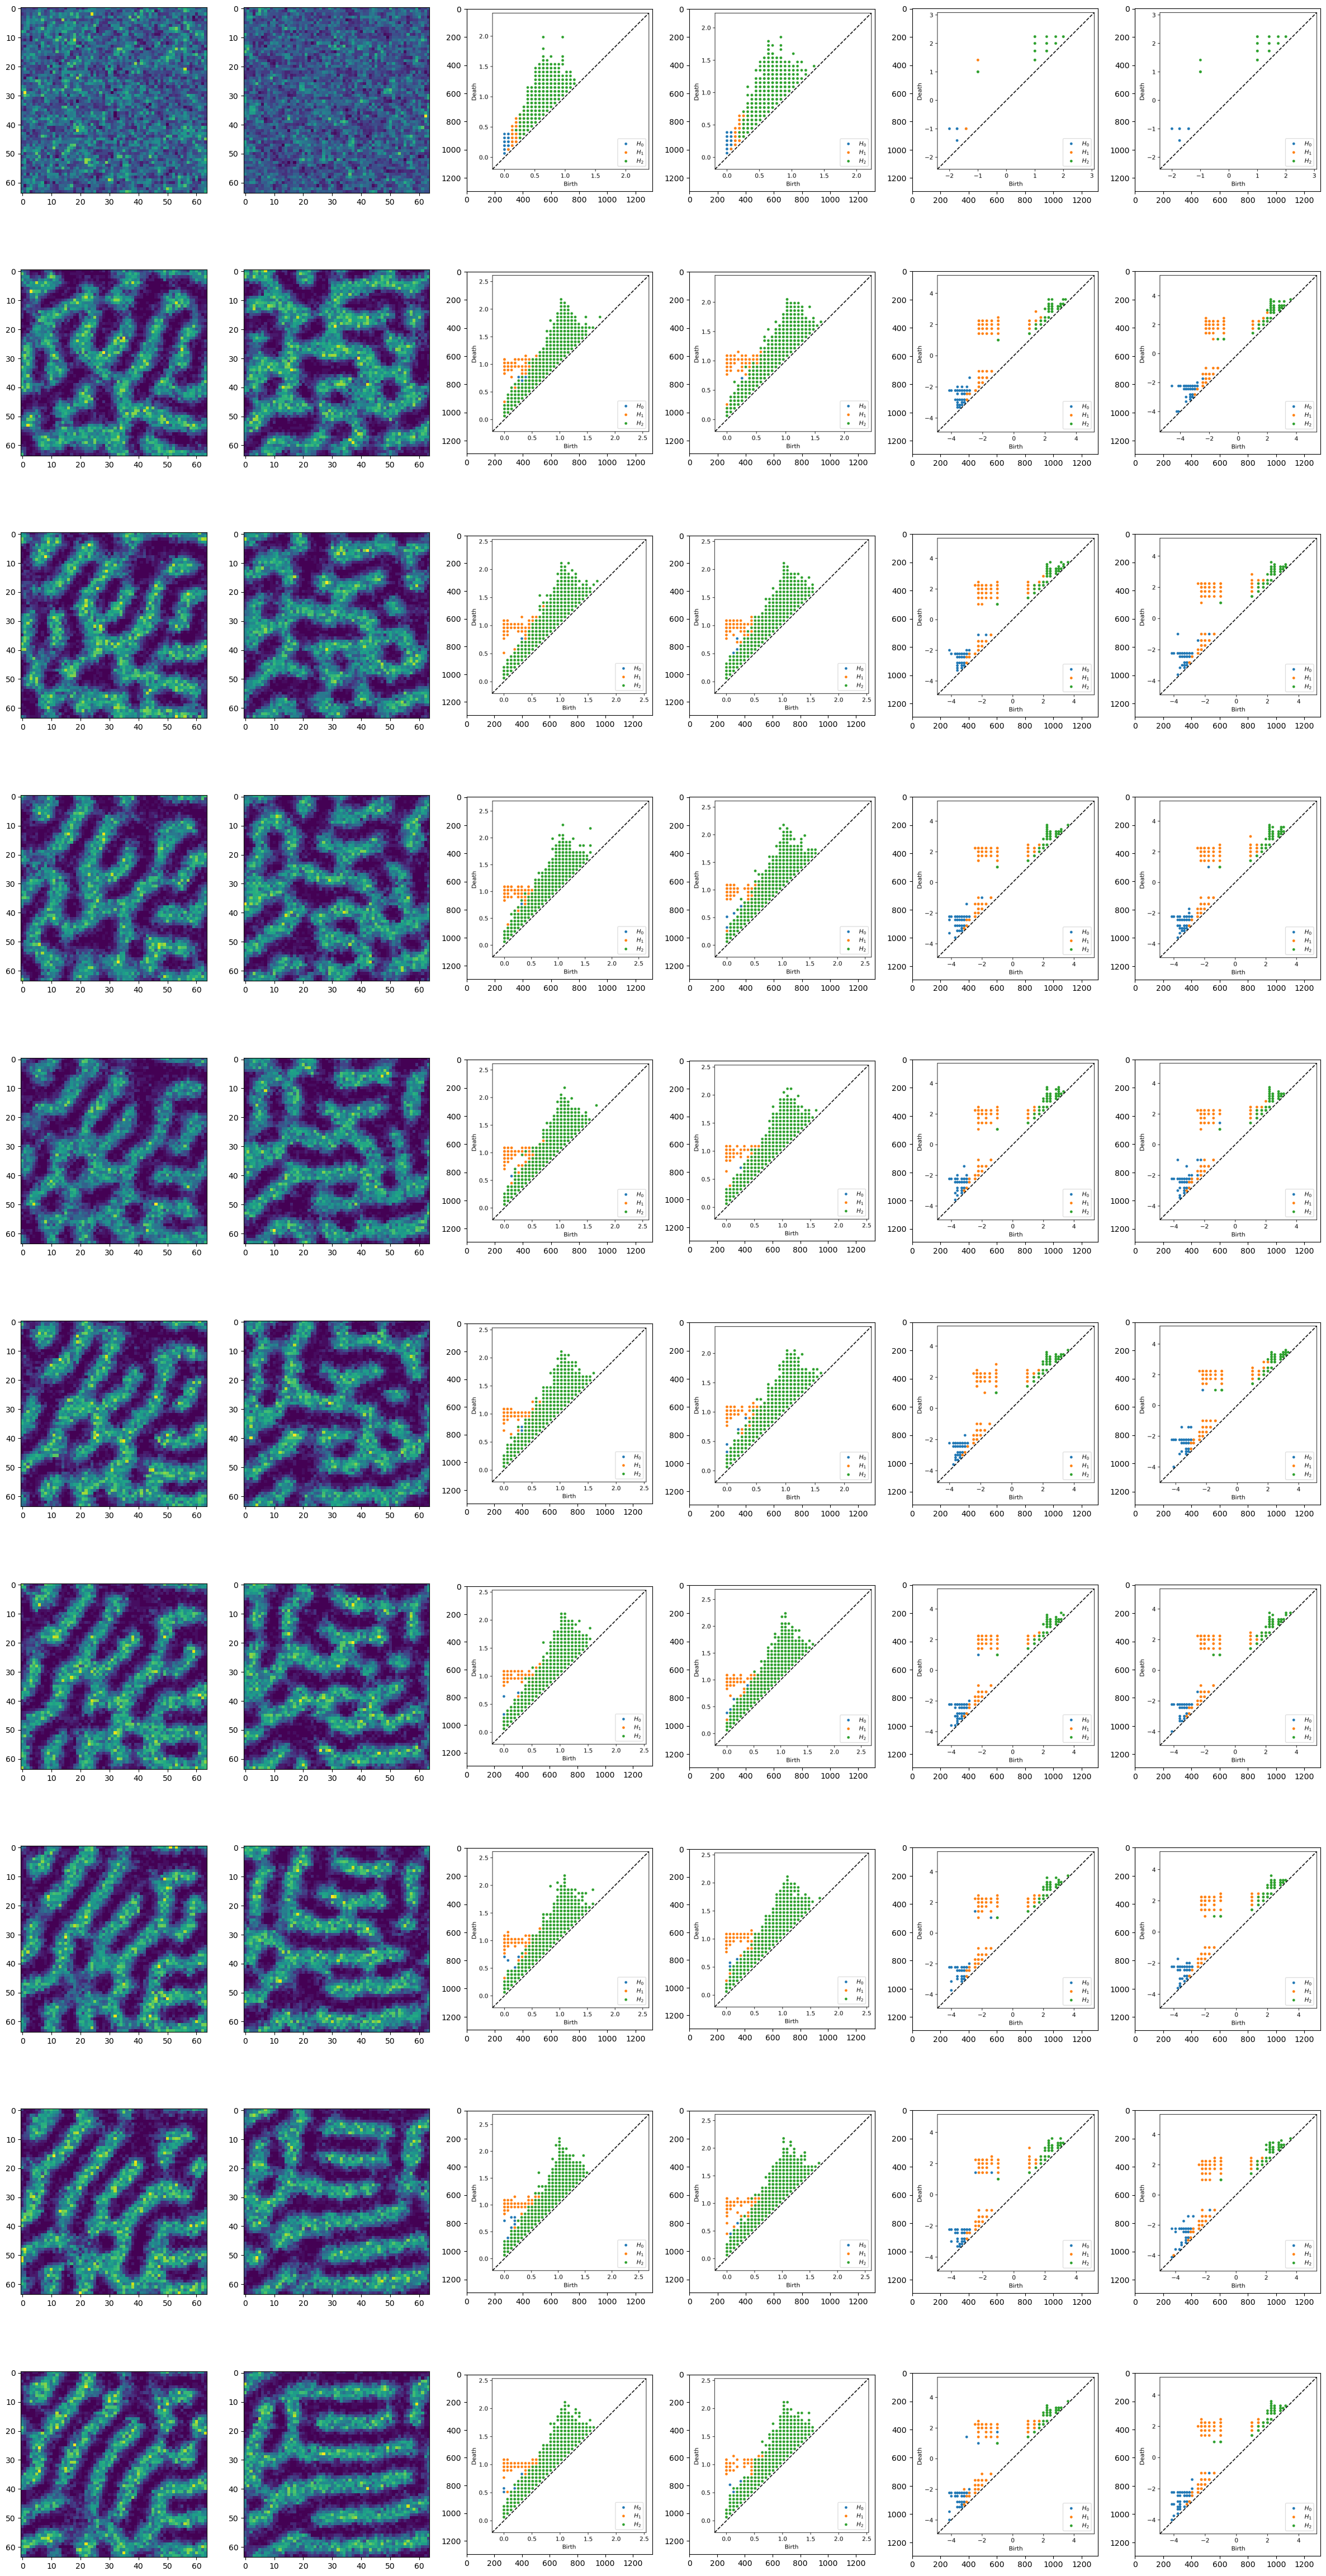

In [63]:
fig.clear()
plt.close()

fig, ax = plt.subplots(10,6,figsize=(30,60))
loc="Z:/data/polyDefect/topology/plots"
for t in range(10):
    ax[t,0].imshow(cubA[t][:,31,:])
    ax[t,1].imshow(cubB[t][:,31,:])
    ax[t,2].imshow(imread(f"{loc}/block0train/topFilt{t}.png"))
    ax[t,3].imshow(imread(f"{loc}/block42train/topFilt{t}.png"))
    ax[t,4].imshow(imread(f"{loc}/block0train/topGeoMed{t}.png"))
    ax[t,5].imshow(imread(f"{loc}/block42train/topGeoMed{t}.png"))

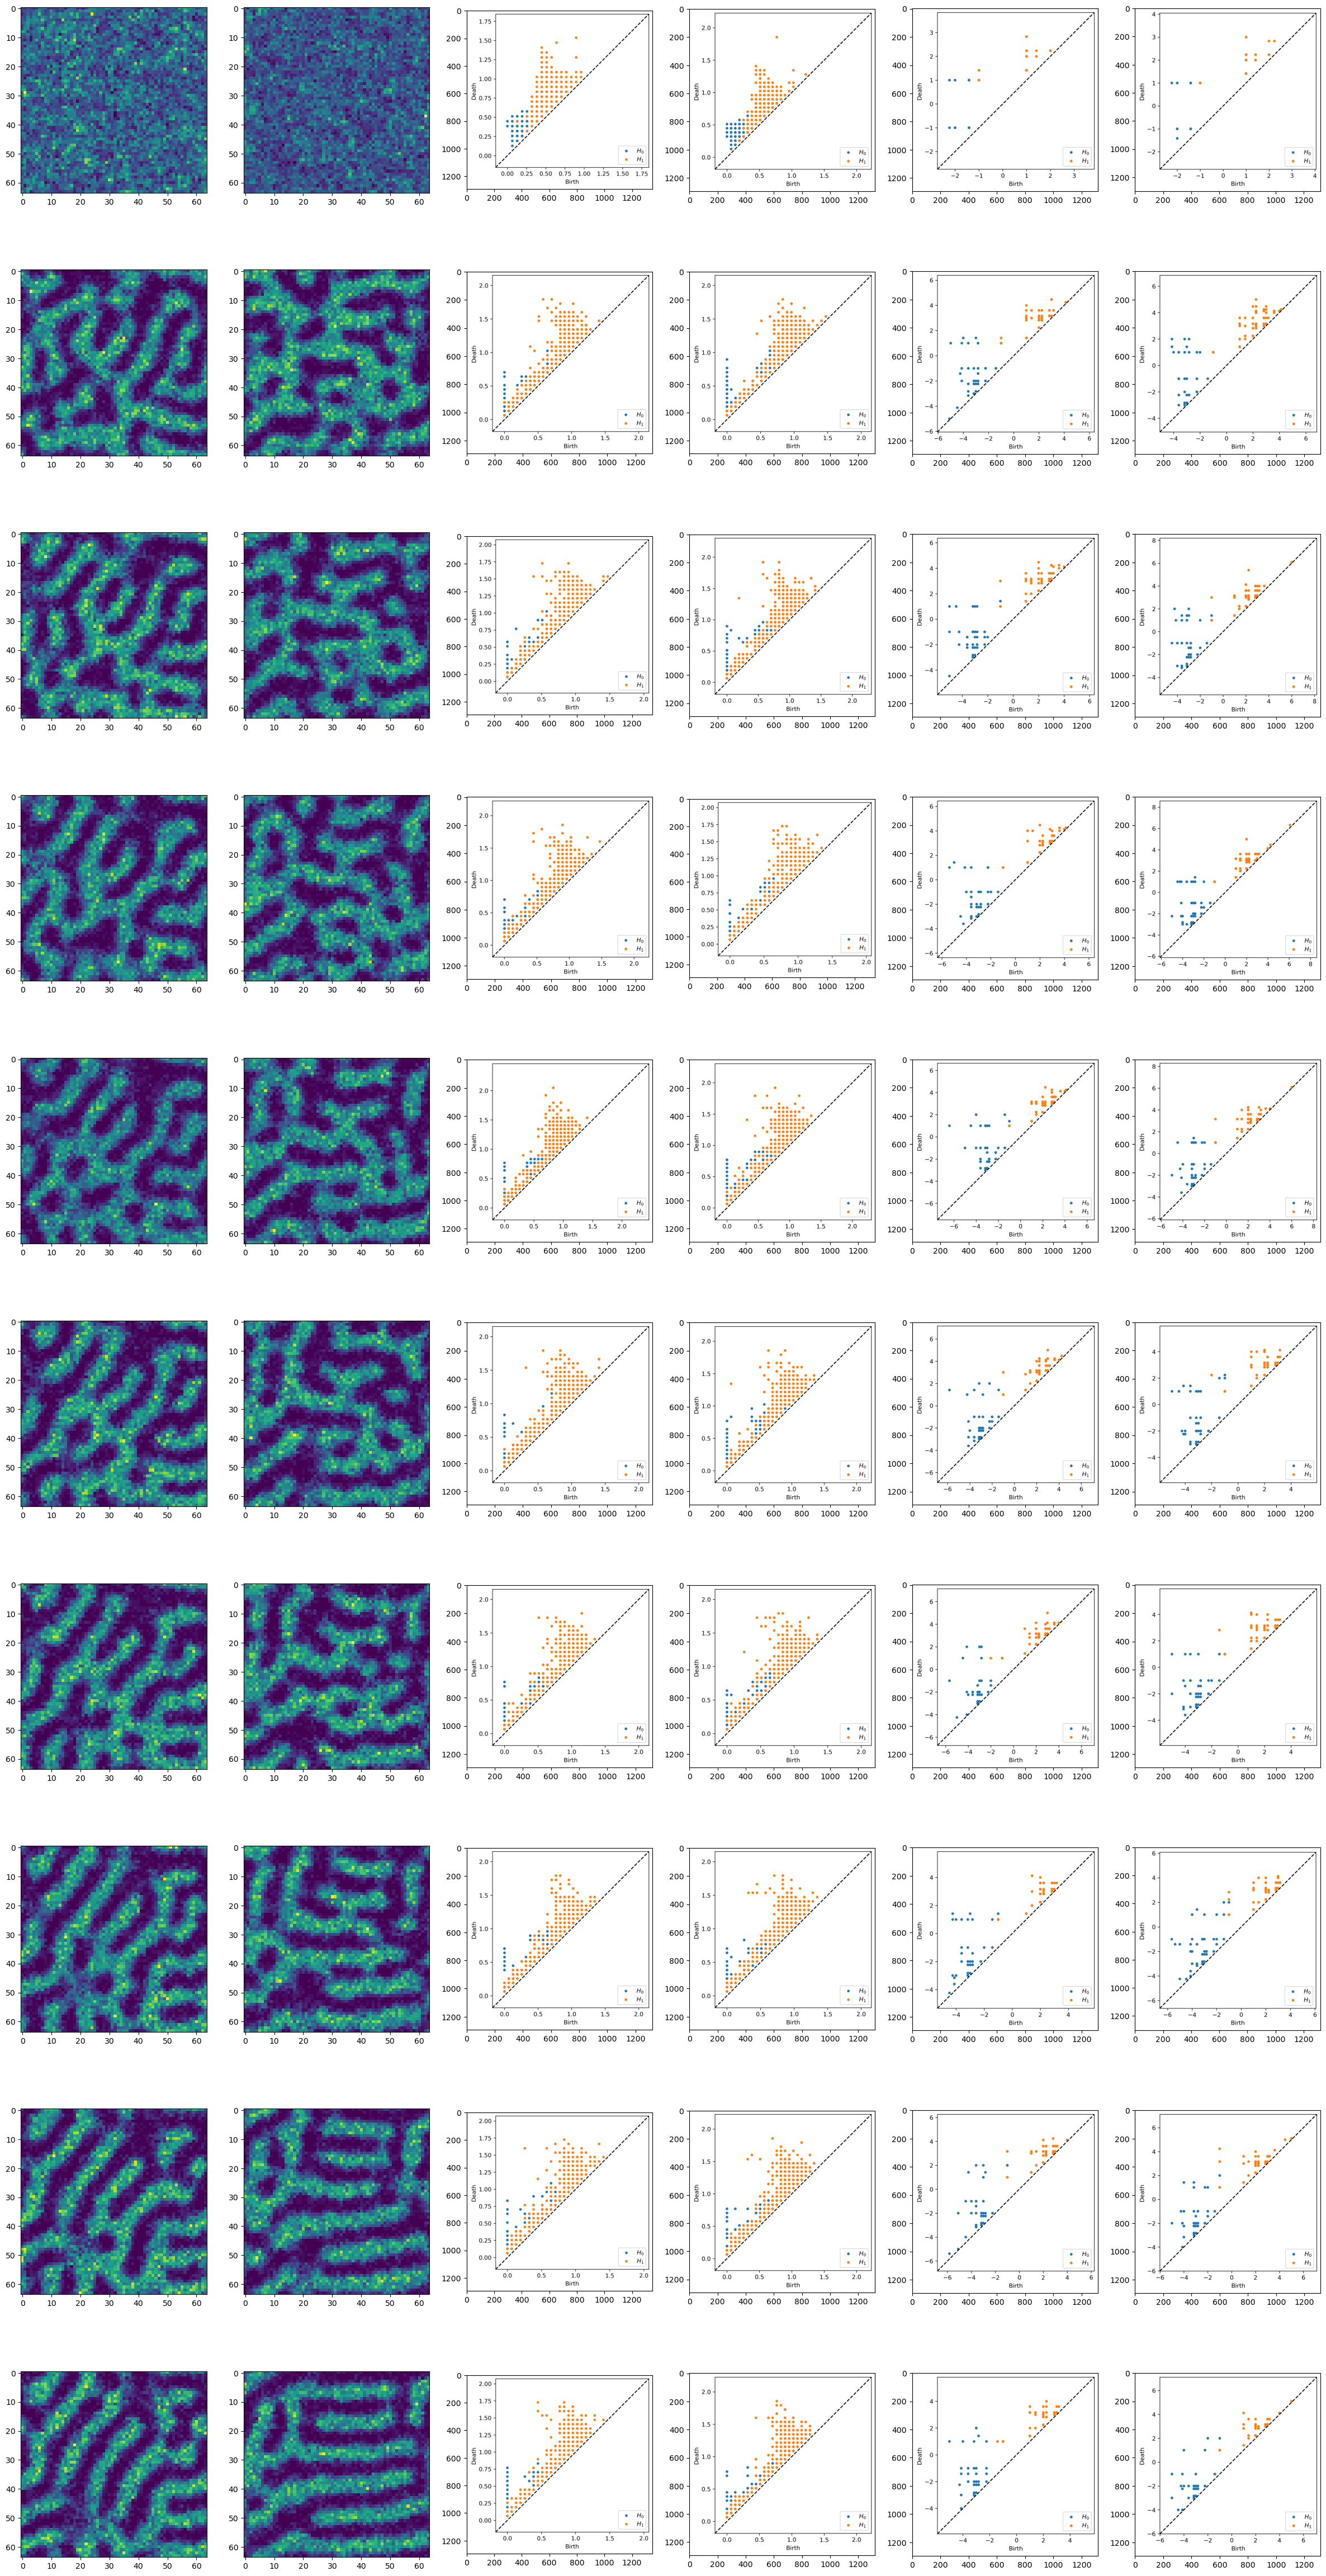

In [73]:
fig.clear()
plt.close()

fig, ax = plt.subplots(10,6,figsize=(30,60))
loc="Z:/data/polyDefect/topology/plots/2dSlice/"
cubA=f[0]
cubB=f[42]
for t in range(10):
    ax[t,0].imshow(cubA[t][:,31,:])
    ax[t,1].imshow(cubB[t][:,31,:])
    ax[t,2].imshow(imread(f"{loc}/block0train/topFilt{t}.png"))
    ax[t,3].imshow(imread(f"{loc}/block42train/topFilt{t}.png"))
    ax[t,4].imshow(imread(f"{loc}/block0train/topGeoMed{t}.png"))
    ax[t,5].imshow(imread(f"{loc}/block42train/topGeoMed{t}.png"))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 2 has 1 dimension(s)

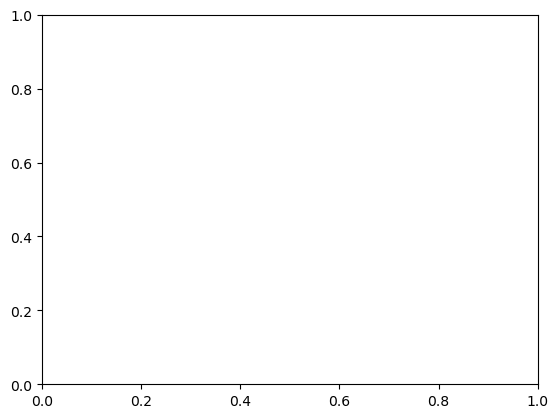

In [65]:
fig, ax = plt.subplots(10,6,figsize=(15,40))
cubA=f[0,:,:,31,:]
cubB=f[42,:,:,31,:]
#tDiagsA={}
#tDiagsAGeo={}

#tDiagsB={}
#tDiagsBGeo={}
loc="Z:/data/polyDefect/topology/plots/2dSlice"
fig.clear()
plt.close()
for t in range(10):
    diags,maxD=persistCube(cubA[t])
    plot_diagrams(diags.copy(),show=False,saveLoc=f"{loc}/block0train/topFilt{t}.png")
    fig.clear()
    plt.close()
    tDiagsA[t]=diags.copy()
    diags,maxD=persistCube(cubB[t])
    tDiagsB[t]=diags.copy()
    plot_diagrams(diags.copy(),show=False,saveLoc=f"{loc}/block42train/topFilt{t}.png")
    fig.clear()
    plt.close()

    diags,maxD=persistGeoVoxel(cubA[t],eps=.448)
    plot_diagrams(diags.copy(),show=False,saveLoc=f"{loc}/block0train/topGeoMed{t}.png")
    fig.clear()
    plt.close()
    tDiagsAGeo[t]=diags.copy()
    diags,maxD=persistGeoVoxel(cubB[t],eps=.448)
    tDiagsBGeo[t]=diags.copy()
    plot_diagrams(diags.copy(),show=False,saveLoc=f"{loc}/block42train/topGeoMed{t}.png")
    fig.clear()
    plt.close()
#fig.show()

